In [1]:
# Load packages
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
players = pd.read_csv('final_df.csv')
players.head()

,owner,week,slot,player,proj,score,draft_price
0,Thomas Bishop,1,QB,Ben Roethlisberger,18.3,22.06,2.0
1,Thomas Bishop,1,RB,James Conner,14.6,2.70,27.0
2,Thomas Bishop,1,RB,Marlon Mack,10.3,7.10,6.0
3,Thomas Bishop,1,WR,Jarvis Landry,11.1,8.60,13.0
4,Thomas Bishop,1,WR,Keenan Allen,11.1,5.70,15.0


## Best 1 Dollar Flex Picks
This ranks non-QB players that were drafted for $1 by total points scored over the season

In [3]:
# Remove any player that has played in the QB slot and that'draft price is not $1
best_draft = players[(~players['player'].isin(players[players['slot']=='QB']['player'].unique().tolist())) & (players['draft_price']==1)]
best_draft.head()

,owner,week,slot,player,proj,score,draft_price
14,Thomas Bishop,1,Bench,Greg Olsen,4.5,10.4,1.0
220,Harry Cutler,1,Bench,Hunter Henry,8.1,9.8,1.0
225,Harry Cutler,1,Bench,O.J. Howard,3.5,11.6,1.0
226,Harry Cutler,1,Bench,Brian Hill,3.7,3.0,1.0
234,Harry Cutler,2,FLEX,Hunter Henry,8.7,11.3,1.0


In [4]:
# Sum scores by owner and player
best_draft = best_draft.groupby(['owner','player','draft_price'])['score'].sum().reset_index(name='total_points')
# Sort total points greatest-to-least
best_draft = best_draft.sort_values(by=['total_points'], ascending=False)
best_draft.head(10)

,owner,player,draft_price,total_points
41,arland crandell,James Robinson,1.0,202.8
28,Matt Boulton,Cole Beasley,1.0,141.5
44,mac keller,Corey Davis,1.0,130.6
23,Jordan Nachbar,Nyheim Hines,1.0,127.7
32,Matt Boulton,Jamaal Williams,1.0,102.2
46,mac keller,Jerick McKinnon,1.0,100.7
27,Matt Boulton,Adrian Peterson,1.0,99.4
31,Matt Boulton,Giovani Bernard,1.0,93.3
8,Harry Cutler,Hunter Henry,1.0,93.2
49,mac keller,Malcolm Brown,1.0,89.8


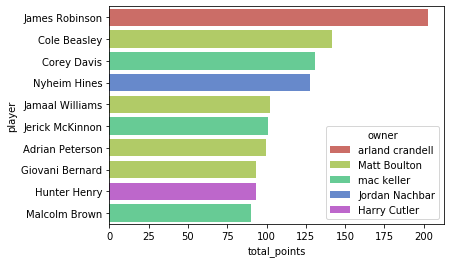

In [25]:
sns.barplot(x='total_points',y='player',data=best_draft.head(10),hue='owner',palette='hls',dodge=False)

## Best Waiver Adds
This ranks all players acquired after the draft by total points scored over the season.

In [26]:
# Remove any player with a draft price
best_wvr = players[players['draft_price'].isnull()]
best_wvr.head()

,owner,week,slot,player,proj,score,draft_price
29,Thomas Bishop,2,Bench,Carlos Hyde,5.7,4.7,NaN
30,Thomas Bishop,2,Bench,John Ross III,6.9,0.0,NaN
31,Thomas Bishop,2,Bench,Miles Boykin,5.3,5.8,NaN
45,Thomas Bishop,3,Bench,Carlos Hyde,5.0,2.8,NaN
46,Thomas Bishop,3,Bench,Zach Pascal,6.3,4.4,NaN


In [27]:
# Sum scores by owner and player
best_wvr = best_wvr.groupby(['owner','player'])['score'].sum().reset_index(name='total_points')
# Sort total points greatest-to-least
best_wvr = best_wvr.sort_values(by=['total_points'], ascending=False)
best_wvr.head(10)

,owner,player,total_points
118,Justin Sanders,Justin Herbert,217.22
129,Russell Rollow,Ben Roethlisberger,181.20
116,Justin Sanders,Chase Claypool,126.60
200,mac keller,Mike Davis,125.80
115,Jordan Nachbar,Tim Patrick,110.70
40,Harry Cutler,Curtis Samuel,108.70
58,Jared Ginsburg,J.D. McKissic,95.50
43,Harry Cutler,Kirk Cousins,95.46
113,Jordan Nachbar,Rex Burkhead,91.90
120,Justin Sanders,Nelson Agholor,90.60


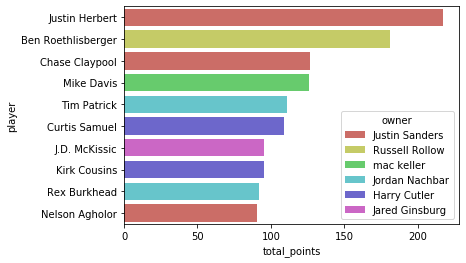

In [28]:
sns.barplot(x='total_points',y='player',data=best_wvr.head(10),hue='owner',palette='hls',dodge=False)

## Most Points Left On The Bench
This ranks the most points scored by a manager’s bench players.

In [55]:
# Filter players dataframe for players in bench slots 
bench = players[players['slot']=='Bench']
# Sum scores by owners and weeks
bench = bench.groupby(['owner','week'])['score'].sum().reset_index(name='total_points')
# Sort total points greatest-to-least
bench = bench.sort_values(by=['total_points'], ascending=False)
#Remove duplicate owners

bench.head(10)

,owner,week,total_points
95,Justin Sanders,5,107.16
67,John van Zalk,3,89.22
66,John van Zalk,2,84.02
74,John van Zalk,10,83.98
119,Russell Rollow,3,79.98
29,Harry Cutler,4,79.68
157,arland crandell,2,79.20
73,John van Zalk,9,78.36
27,Harry Cutler,2,76.32
169,mac keller,1,74.60


In [60]:
bench['owner_week'] = bench['owner'] + ' (Week ' + bench['week'].map(str) + ')'

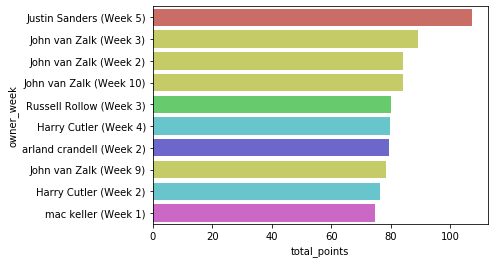

In [67]:
p = sns.barplot(x='total_points',y='owner_week',data=bench.head(10),hue='owner',dodge=False,palette='hls')
p.legend_.remove()

## Weekly Roster With Fewest Drafted Players
This shows the weekly lineups that included the most players claimed off waivers. A lineup for this league is made up of 9 players.

In [146]:
# Create a new dataframe with drafted players and players on bench or IR removed
waiver_squad = players[players['draft_price'].isnull() & (~players['slot'].isin(['IR','Bench']))]
waiver_squad.head()

,owner,week,slot,player,proj,score,draft_price
50,Thomas Bishop,4,RB,Travis Homer,5.0,7.3,NaN
69,Thomas Bishop,5,WR,Kalif Raymond,7.3,3.6,NaN
87,Thomas Bishop,6,FLEX,Breshad Perriman,7.9,8.2,NaN
88,Thomas Bishop,6,FLEX,Demarcus Robinson,7.5,9.4,NaN
98,Thomas Bishop,7,RB,AJ Dillon,10.5,1.1,NaN


In [147]:
# Sum the number of players (rows) by owner and week
waiver_squad = waiver_squad.groupby(['owner','week']).size().reset_index(name='waiver_players')
# Sort waiver_players greatest-to-least
waiver_squad = waiver_squad.sort_values(by=['waiver_players'], ascending=False)
waiver_squad.head(10)

,owner,week,waiver_players
40,Jared Ginsburg,10,8
36,Jared Ginsburg,6,6
38,Jared Ginsburg,8,6
140,mac keller,9,6
42,Jared Ginsburg,12,6
34,Jared Ginsburg,4,6
9,David Golembeski,11,6
69,Jordan Nachbar,10,5
65,Jordan Nachbar,6,5
43,Jared Ginsburg,13,5


In [148]:
# Loop owners and list the number of weeks that they played a certain number of waiver/undrafted players 

# Create empty lists to store values
owners=[]
waiver_players=[]
num_weeks=[]
weeks=[]


# Loop through owners
for i in waiver_squad['owner'].unique().tolist():
    
    # Loop through number of possible waiver players each owner played
    for j in range(1,(waiver_squad['waiver_players'].max()+1)):
        
        # Create a new dataframe for a single owner with all weeks that they played a certain number of waiver players
        test = waiver_squad[(waiver_squad['owner']==i) & (waiver_squad['waiver_players']==j)]
        
        # Create a list of those weeks and remove brackets
        weeks_list = test['week'].unique().tolist()
        
        num_weeks.append(len(weeks_list))

        weeks_str = ','.join(map(str, weeks_list))
        
        # Append values to empty lists
        weeks.append(weeks_str)

        owners.append(i)

        waiver_players.append(j)

# Overwrite waiver_squad dataframe with new condensed data
waiver_squad = pd.DataFrame(
    {'owner': owners,
     'waiver_players':waiver_players,
     'num_weeks':num_weeks,
     'weeks': weeks
    })  
waiver_squad

,owner,waiver_players,num_weeks,weeks
0,Jared Ginsburg,1,0,
1,Jared Ginsburg,2,1,2
2,Jared Ginsburg,3,0,
3,Jared Ginsburg,4,4,"7,9,11,3"
4,Jared Ginsburg,5,2,"13,5"
...,...,...,...,...
107,arland crandell,4,0,
108,arland crandell,5,0,
109,arland crandell,6,0,
110,arland crandell,7,0,


In [149]:
# Remove rows where owner did not play a certain number of waiver players
waiver_squad = waiver_squad[(waiver_squad['weeks']!='')]# & (waiver_squad['waiver_players']>=5)
# Sort by waiver players greatest to least
waiver_squad = waiver_squad.sort_values(by=['waiver_players','num_weeks'], ascending=False)
waiver_squad.head()

,owner,waiver_players,num_weeks,weeks
7,Jared Ginsburg,8,1,10
5,Jared Ginsburg,6,4,"6,8,12,4"
13,mac keller,6,1,9
21,David Golembeski,6,1,11
4,Jared Ginsburg,5,2,"13,5"


In [169]:
# Store order for plot
order = waiver_squad['owner'].unique().tolist()
order = dict(zip(order, range(len(order))))
order

{'Jared Ginsburg': 0,
 'mac keller': 1,
 'David Golembeski': 2,
 'Jordan Nachbar': 3,
 'Frank Grace': 4,
 'Russell Rollow': 5,
 'Justin Sanders': 6,
 'Thomas Bishop': 7,
 'Jimmy Koch': 8,
 'Matt Boulton': 9,
 'Harry Cutler': 10,
 'Trevor Gibson': 11,
 'arland crandell': 12,
 'John van Zalk': 13}

In [186]:
# Conver to matrix so that each count of waiver players are columns
mtx = waiver_squad.pivot_table(index='owner',columns='waiver_players',values='num_weeks').reset_index()
# mtx = mtx.fillna(0)
mtx

waiver_players,owner,1,2,3,4,5,6,8
0,David Golembeski,2.0,7.0,1.0,1.0,NaN,1.0,NaN
1,Frank Grace,2.0,8.0,1.0,1.0,NaN,NaN,NaN
2,Harry Cutler,4.0,3.0,1.0,NaN,NaN,NaN,NaN
3,Jared Ginsburg,NaN,1.0,NaN,4.0,2.0,4.0,1.0
4,Jimmy Koch,3.0,1.0,4.0,NaN,NaN,NaN,NaN
5,John van Zalk,7.0,1.0,NaN,NaN,NaN,NaN,NaN
6,Jordan Nachbar,2.0,1.0,4.0,4.0,2.0,NaN,NaN
7,Justin Sanders,3.0,2.0,4.0,1.0,NaN,NaN,NaN
8,Matt Boulton,6.0,3.0,2.0,NaN,NaN,NaN,NaN
9,Russell Rollow,2.0,3.0,7.0,1.0,NaN,NaN,NaN


In [187]:
# Use the stored order to sort the matrix
mtx['order'] = mtx['owner'].map(order)
mtx = mtx.sort_values('order')
mtx.drop('order',axis=1,inplace=True)
mtx.head()

waiver_players,owner,1,2,3,4,5,6,8
3,Jared Ginsburg,NaN,1.0,NaN,4.0,2.0,4.0,1.0
13,mac keller,NaN,2.0,5.0,4.0,NaN,1.0,NaN
0,David Golembeski,2.0,7.0,1.0,1.0,NaN,1.0,NaN
6,Jordan Nachbar,2.0,1.0,4.0,4.0,2.0,NaN,NaN
1,Frank Grace,2.0,8.0,1.0,1.0,NaN,NaN,NaN
9,Russell Rollow,2.0,3.0,7.0,1.0,NaN,NaN,NaN
7,Justin Sanders,3.0,2.0,4.0,1.0,NaN,NaN,NaN
10,Thomas Bishop,2.0,4.0,3.0,1.0,NaN,NaN,NaN
4,Jimmy Koch,3.0,1.0,4.0,NaN,NaN,NaN,NaN
8,Matt Boulton,6.0,3.0,2.0,NaN,NaN,NaN,NaN


In [188]:
# Set the index as the owner
mtx = mtx.set_index('owner')

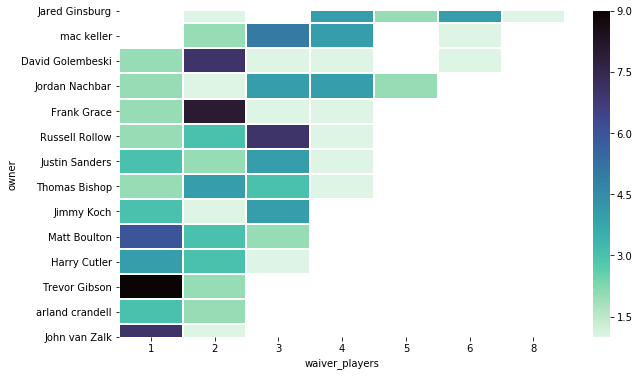

In [212]:
# Plot
plt.figure(figsize=(10,6))
p = sns.heatmap(mtx,cmap='mako_r', linecolor='white',linewidth=1)

## Highest Variation In Scoring
This shows how managers' weekly scores varied. Boxplots are used here. A larger interquartile range means that a manager’s weekly points were often far above or below their median points. 

In [68]:
# Subset core dataframe and remove bench and IR players
scoring_var = players[~players['slot'].isin(['IR','Bench'])]
scoring_var.head()

,owner,week,slot,player,proj,score,draft_price
0,Thomas Bishop,1,QB,Ben Roethlisberger,18.3,22.06,2.0
1,Thomas Bishop,1,RB,James Conner,14.6,2.70,27.0
2,Thomas Bishop,1,RB,Marlon Mack,10.3,7.10,6.0
3,Thomas Bishop,1,WR,Jarvis Landry,11.1,8.60,13.0
4,Thomas Bishop,1,WR,Keenan Allen,11.1,5.70,15.0


In [69]:
# Sum scores by owner and week
scoring_var = scoring_var.groupby(['owner','week'])['score'].sum().reset_index()
scoring_var.head()

,owner,week,score
0,David Golembeski,1,105.46
1,David Golembeski,2,86.76
2,David Golembeski,3,66.60
3,David Golembeski,4,105.70
4,David Golembeski,5,103.74


In [87]:
#Get medians scores for owners to order boxplots
order= scoring_var.groupby('owner')['score'].median().reset_index(name='median').sort_values('median',ascending=False)['owner'].to_list()

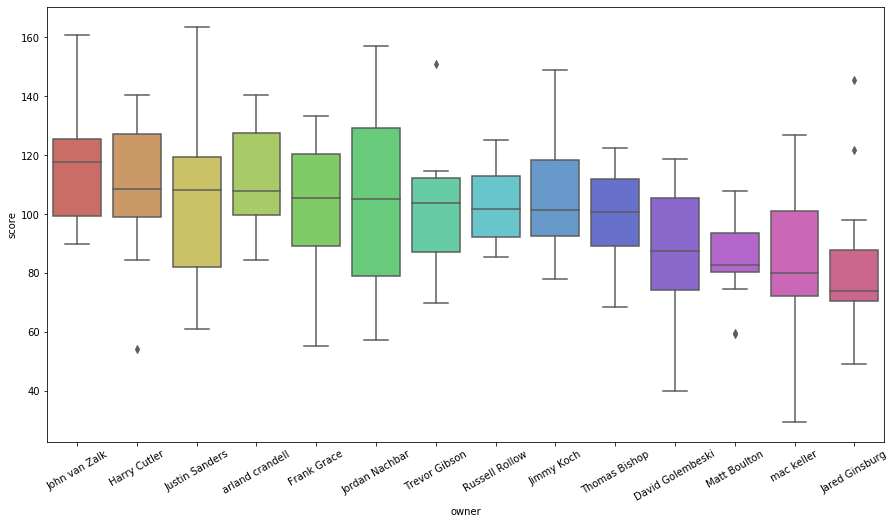

In [89]:
plt.figure(figsize=(15,8))
p = sns.boxplot(x='owner',y='score',data=scoring_var,order=order,palette='hls')
labels = p.get_xticklabels()
p.set_xticklabels(labels, rotation=30)
p

## Best WR and RB Committees
This compares each manager’s average points per week for two specific slots - RB and WR. A slot is different from a position. For example, for RB this only includes points from the 2 designated RB slots in this league's lineups, not RBs put in the flex slots.

#### RB

In [16]:
# Create a new dataframe with only players in RB slots
rbs = players[players['slot']=='RB']
rbs.head()

,owner,week,slot,player,proj,score,draft_price
1,Thomas Bishop,1,RB,James Conner,14.6,2.7,27.0
2,Thomas Bishop,1,RB,Marlon Mack,10.3,7.1,6.0
17,Thomas Bishop,2,RB,Miles Sanders,14.1,18.6,49.0
18,Thomas Bishop,2,RB,James Conner,12.2,19.1,27.0
33,Thomas Bishop,3,RB,Miles Sanders,17.4,12.7,49.0


In [17]:
# List of all players that started at least 4 games at RB for each owner

owners=[]
rb_names=[]
backs_used=[]
avg_scores=[]

for i in rbs['owner'].unique().tolist():

    data = rbs[rbs['owner']==i]
    
    # Count number of starts each RB got
    starts = data.groupby(['owner','player']).size().reset_index(name='starts')
    
    # Keep those with at least 4 starts
    starts = starts[starts['starts']>=4]
    
    # Calculate the average total weekly score at the RB position
    weekly_score = data.groupby(['owner','week'])['score'].sum().reset_index()
    
    rb_list = data['player'].unique().tolist()

    primary_list = starts['player'].unique().tolist()
    
    primary_str = ', '.join(map(str, primary_list))
    
    backs_used.append(len(rb_list))

    rb_names.append(primary_str)
    
    avg_scores.append(round(weekly_score['score'].mean(),2))

    owners.append(i)

rbs = pd.DataFrame(
    {'owners': owners,
     'avg_score':avg_scores,
     'rbs_used':backs_used,
     'primary_rbs':rb_names
    })  
rbs = rbs.sort_values(by=['avg_score'], ascending=False)
rbs

,owners,avg_score,rbs_used,primary_rbs
6,arland crandell,36.06,4,"Dalvin Cook, James Robinson, Ronald Jones II"
2,Jordan Nachbar,31.79,4,"Alvin Kamara, Nick Chubb, Rex Burkhead"
4,Justin Sanders,31.46,4,"Antonio Gibson, Derrick Henry, Kenyan Drake"
5,David Golembeski,26.86,6,"Chris Carson, D'Andre Swift, David Montgomery"
7,Russell Rollow,24.82,9,"Aaron Jones, Myles Gaskin, Wayne Gallman"
9,John van Zalk,23.25,4,"Joe Mixon, Josh Jacobs, Phillip Lindsay"
12,Trevor Gibson,21.37,5,"Jonathan Taylor, Kareem Hunt, Melvin Gordon III"
11,Matt Boulton,20.85,5,"Adrian Peterson, Ezekiel Elliott"
0,Thomas Bishop,20.25,8,"James Conner, Miles Sanders"
1,Harry Cutler,19.85,7,"David Johnson, Todd Gurley II"


#### WR

In [18]:
wrs = players[players['slot']=='WR']
wrs.head()

,owner,week,slot,player,proj,score,draft_price
3,Thomas Bishop,1,WR,Jarvis Landry,11.1,8.6,13.0
4,Thomas Bishop,1,WR,Keenan Allen,11.1,5.7,15.0
5,Thomas Bishop,1,WR,A.J. Green,9.9,7.6,11.0
19,Thomas Bishop,2,WR,Jarvis Landry,10.5,6.1,13.0
20,Thomas Bishop,2,WR,Keenan Allen,10.6,13.1,15.0


In [19]:
owners=[]
wr_names=[]
wrs_used=[]
avg_scores=[]

for i in wrs['owner'].unique().tolist():

    data = wrs[wrs['owner']==i]
    
    starts = data.groupby(['owner','player']).size().reset_index(name='starts')
    
    starts = starts[starts['starts']>=7]
    
    weekly_score = data.groupby(['owner','week'])['score'].sum().reset_index()
    
    wr_list = data['player'].unique().tolist()

    primary_list = starts['player'].unique().tolist()
    
    primary_str = ', '.join(map(str, primary_list))
    
    wrs_used.append(len(wr_list))

    wr_names.append(primary_str)
    
    avg_scores.append(round(weekly_score['score'].mean(),2))

    owners.append(i)

wrs = pd.DataFrame(
    {'owners': owners,
     'avg_score':avg_scores,
     'wrs_used':wrs_used,
     'primary_wrs':wr_names
    })  
wrs = wrs.sort_values(by=['avg_score'], ascending=False)
wrs

,owners,avg_score,wrs_used,primary_wrs
3,Frank Grace,42.84,8,"Davante Adams, Tyreek Hill"
9,John van Zalk,42.78,6,"DK Metcalf, Justin Jefferson, Will Fuller V"
8,Jimmy Koch,42.18,6,"A.J. Brown, Adam Thielen, Terry McLaurin"
7,Russell Rollow,37.59,7,"Allen Robinson II, Julio Jones, Robby Anderson..."
6,arland crandell,36.46,6,"Chris Godwin, Diontae Johnson, Mike Evans"
1,Harry Cutler,36.28,6,"Amari Cooper, Cooper Kupp, Tyler Boyd"
10,Jared Ginsburg,34.74,6,"Calvin Ridley, DeAndre Hopkins, Keelan Cole Sr."
12,Trevor Gibson,30.51,7,"DJ Moore, Michael Thomas, Stefon Diggs"
5,David Golembeski,28.41,7,"Jamison Crowder, JuJu Smith-Schuster"
13,mac keller,26.85,10,"Corey Davis, Laviska Shenault Jr., Robert Woods"
